<a href="https://colab.research.google.com/github/arturodeleon19/Data-Science-Analysis-Projects/blob/main/Walmart%20Sales/Walmart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mikhail1681/walmart-sales")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/walmart-sales


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/kaggle/input/walmart-sales/Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


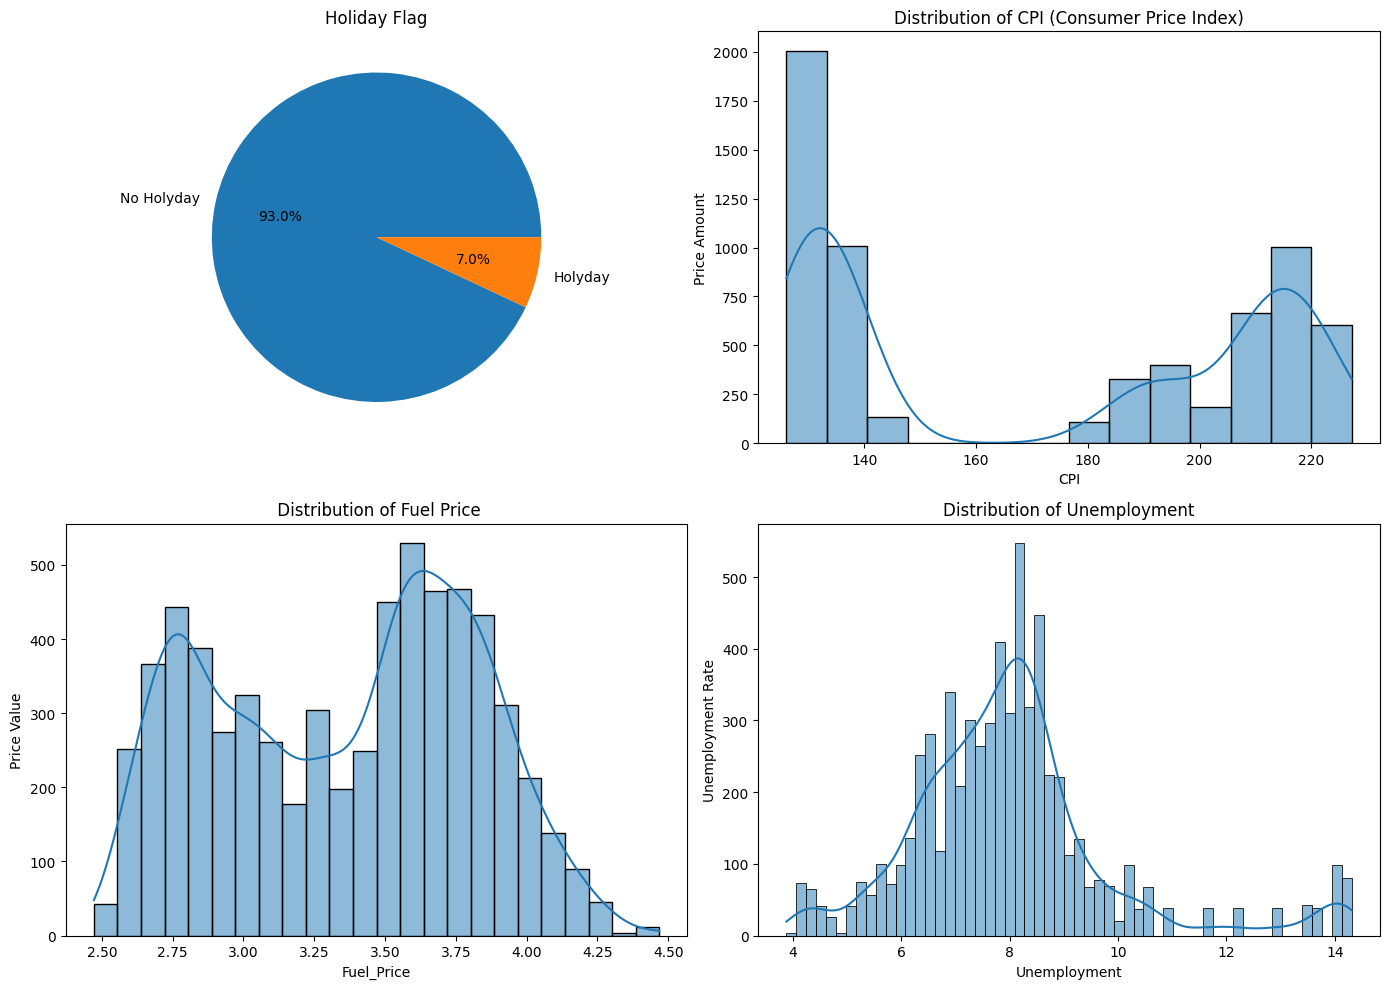

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

flag = df['Holiday_Flag']
axs[0,0].pie(flag.value_counts(), labels=['No Holyday', 'Holyday'], autopct='%1.1f%%')
axs[0,0].set_title('Holiday Flag')

sns.histplot(df['Fuel_Price'], ax=axs[1,0], kde=True)
axs[1,0].set_title(' Distribution of Fuel Price')
axs[1,0].set_ylabel('Price Value')

sns.histplot(df['CPI'], ax=axs[0,1], kde=True)
axs[0,1].set_title('Distribution of CPI (Consumer Price Index)')
axs[0,1].set_ylabel('Price Amount')

sns.histplot(df['Unemployment'], ax=axs[1,1], kde=True)
axs[1,1].set_title('Distribution of Unemployment')
axs[1,1].set_ylabel('Unemployment Rate')

plt.tight_layout()
plt.show()

**Observations on Data**
> * Holyday Flag
>> The distribution of holy days as expected has a majority of no holydays.
> * CPI Data
>>  This feature has a bimodal distribution with more data to the left then the right.
>* Fuel Price
>> This feature has a well a bimodal distribution but with a little bit more data to the right than the left.
>* Unemployment
>> This feature has a right skewed distribution

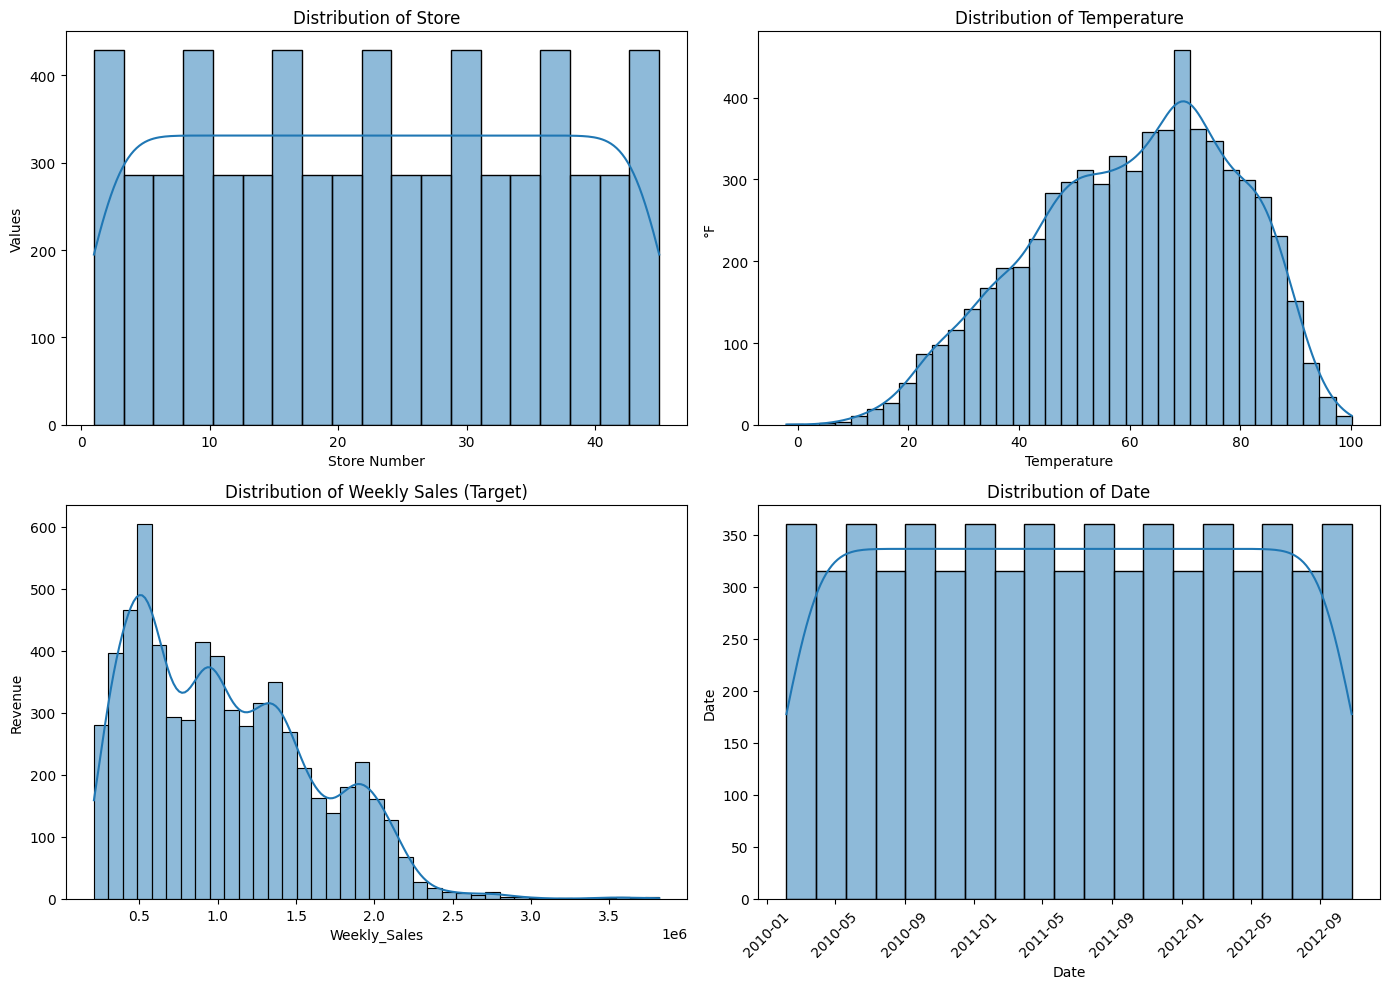

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['Store'], ax=axs[0,0], kde=True)
axs[0,0].set_title('Distribution of Store')
axs[0,0].set_ylabel('Values')
axs[0,0].set_xlabel('Store Number')

sns.histplot(df['Weekly_Sales'], ax=axs[1,0], kde=True)
axs[1,0].set_title('Distribution of Weekly Sales (Target)')
axs[1,0].set_ylabel('Revenue')

sns.histplot(df['Temperature'], ax=axs[0,1], kde=True)
axs[0,1].set_title('Distribution of Temperature')
axs[0,1].set_ylabel('°F')

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

sns.histplot(df['Date'], ax=axs[1,1], kde=True)
axs[1,1].set_title('Distribution of Date')
axs[1,1].set_ylabel('Date')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

**Observation on Data**
>* Store
>> * The Store distribution is uniform with good variations of different stores
>* Temperature
>> * The Temperature feature has a left skewed distribution
>* Weekly Sales
>> * The weekly sales feature has a right skewed distribution
>* Date
>> * The date feature has a uniform distribution  

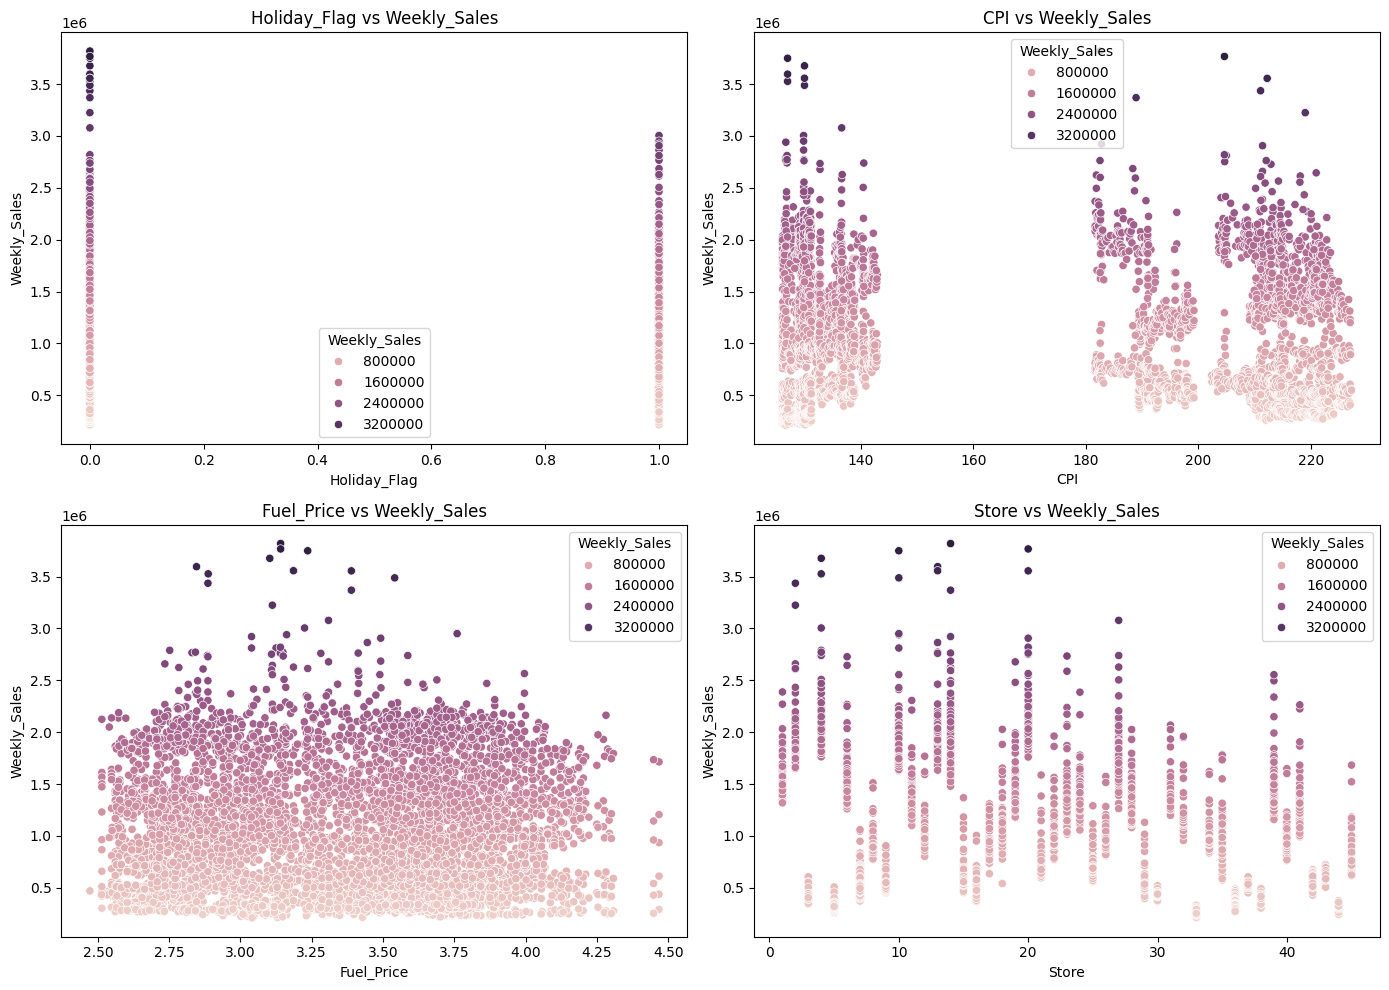

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(data=df, x='Holiday_Flag', y='Weekly_Sales', ax=axs[0,0],hue='Weekly_Sales')
axs[0,0].set_title('Holiday_Flag vs Weekly_Sales')
axs[0,0].set_xlabel('Holiday_Flag')
axs[0,0].set_ylabel('Weekly_Sales')

sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', ax=axs[1,0], hue='Weekly_Sales')
axs[1,0].set_title('Fuel_Price vs Weekly_Sales')
axs[1,0].set_xlabel('Fuel_Price')
axs[1,0].set_ylabel('Weekly_Sales')

sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', ax=axs[0,1], hue='Weekly_Sales')
axs[0,1].set_title('CPI vs Weekly_Sales')
axs[0,1].set_xlabel('CPI')
axs[0,1].set_ylabel('Weekly_Sales')

sns.scatterplot(data=df, x='Store', y='Weekly_Sales', ax=axs[1,1], hue='Weekly_Sales')
axs[1,1].set_title('Store vs Weekly_Sales')
axs[1,1].set_xlabel('Store')
axs[1,1].set_ylabel('Weekly_Sales')

plt.tight_layout()
plt.show()

**Observation of the Data**
>* Holyday vs Weekly sales
>> * The scatter plot of these two features shows what it may had been expected that non holydays sales are more compare to holydays but not in a very large marging
>* CPI vs Weekly
>> * The scatter plot of CPI vs Weekly Sales shows to had no correlation with the target data
>* Fuel Price vs Weekly Price
>>* The scatter plot of these two features shows no correlation other that at very high fuel prices after 4.30 forward seems that we are missing data or sales are not happening until we reach 4.40.
>* Store vs Weekly Sales
>>* The scatter plot for these two features again shows no correlation but for store 1 to about store 20 it seems to be some outliners on the data

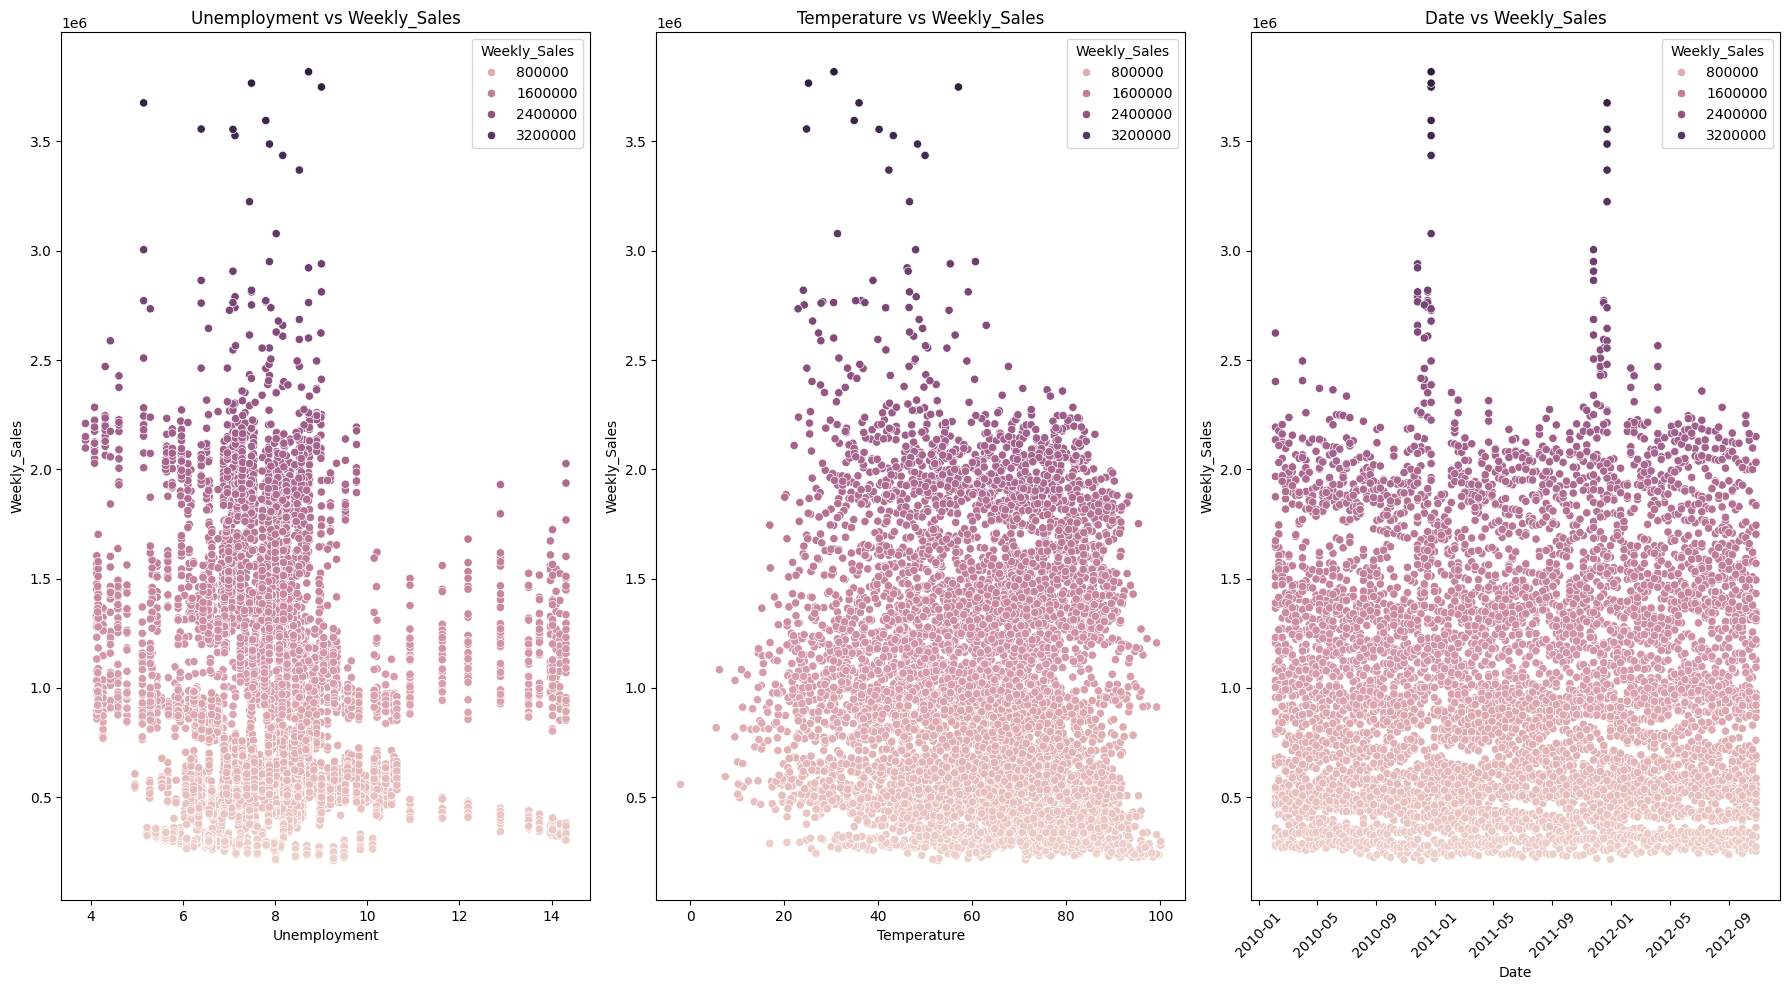

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 10))

sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', ax=axs[0], hue='Weekly_Sales')
axs[0].set_title('Unemployment vs Weekly_Sales')
axs[0].set_xlabel('Unemployment')
axs[0].set_ylabel('Weekly_Sales')

sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', ax=axs[1], hue='Weekly_Sales')
axs[1].set_title('Temperature vs Weekly_Sales')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Weekly_Sales')

sns.scatterplot(data=df, x='Date', y='Weekly_Sales', ax=axs[2], hue='Weekly_Sales')
axs[2].set_title('Date vs Weekly_Sales')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Weekly_Sales')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Observations on Data**
>* Unemployment vs Weekly Sales
>>* The scatter plot on these two features does not show a strong correlation among the features but it shows outliers as the unemployment stays low, when unemployment gets higher the outliers seem to go down and stay at a regular level.
>* Temperature vs Weekly Sales
>>* The scatter plot for these two features shows no correlation among the feature.
>* Date vs Weekly Sales
>>* The scatter Plot for these two features shows no correlation but it apperas to show two spikes on outliers one at year 2011 and the oher at year 2012 both on the first month of the year.  

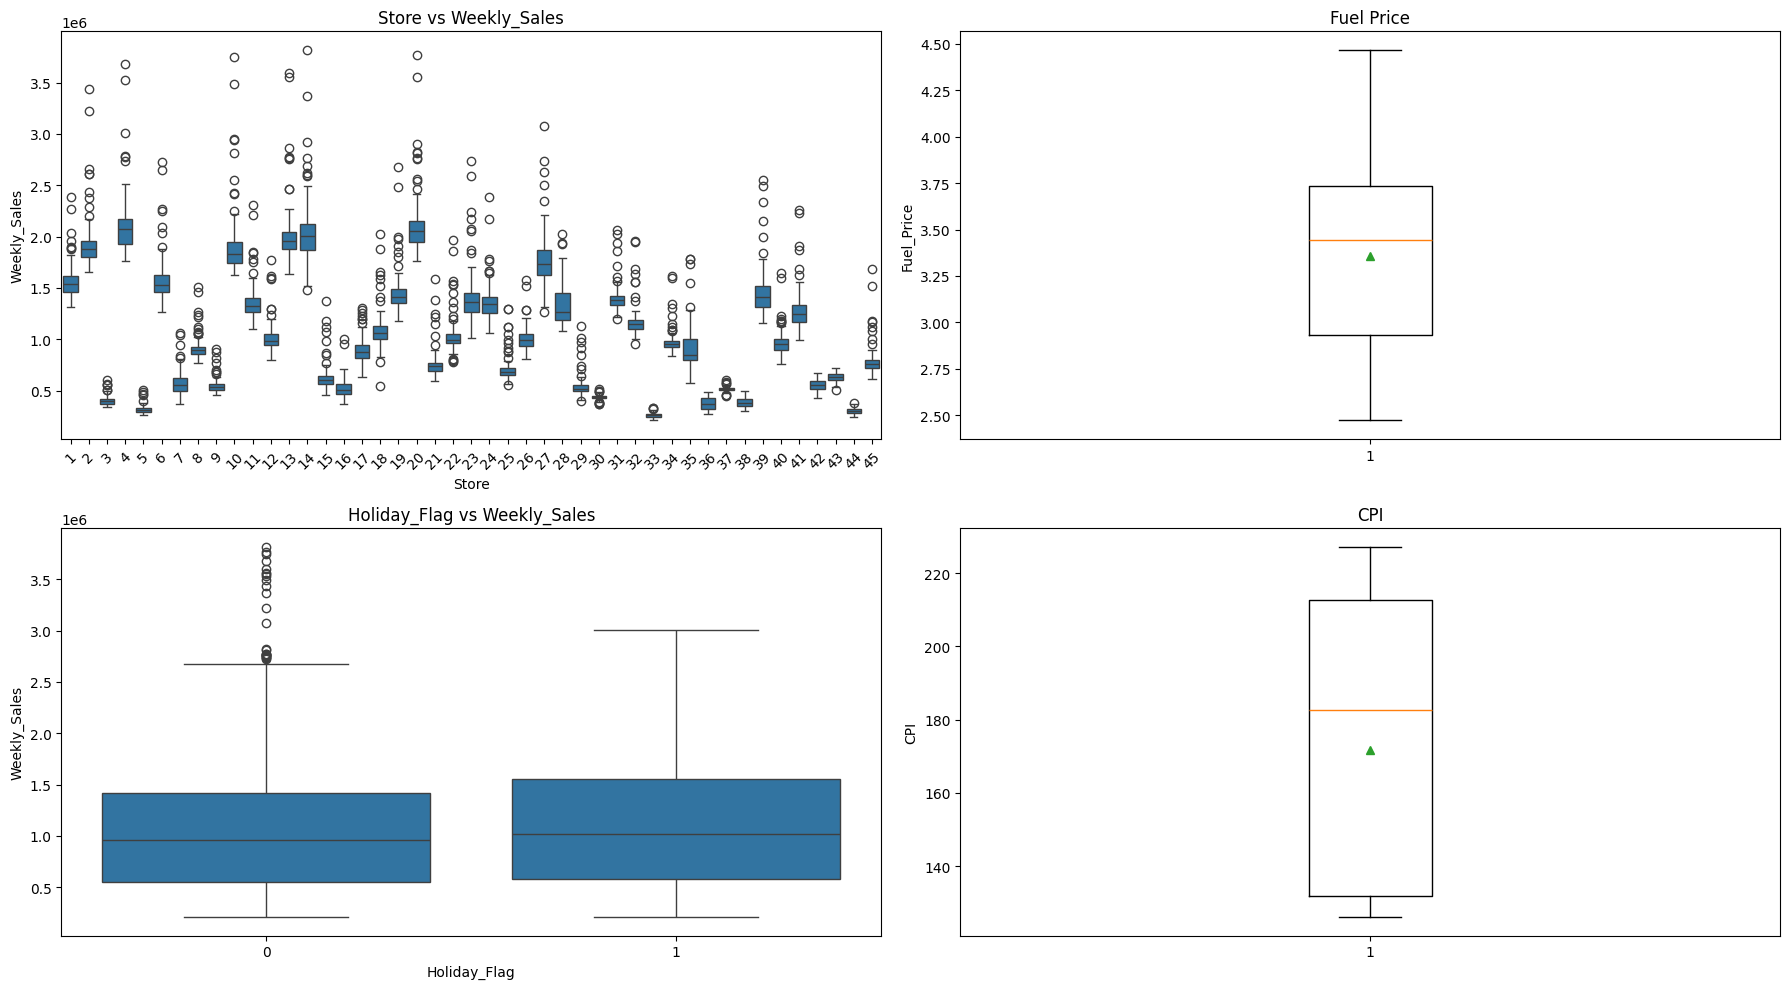

In [ ]:
fig,axs = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(data=df, x='Store', y='Weekly_Sales', ax=axs[0,0])
axs[0,0].set_title('Store vs Weekly_Sales')
axs[0,0].set_xlabel('Store')
axs[0,0].set_ylabel('Weekly_Sales')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=45)

sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales', ax=axs[1,0])
axs[1,0].set_title('Holiday_Flag vs Weekly_Sales')
axs[1,0].set_xlabel('Holiday_Flag')
axs[1,0].set_ylabel('Weekly_Sales')

axs[0,1].boxplot(x = df['Fuel_Price'], showmeans=True)
axs[0,1].set_title('Fuel Price')
axs[0,1].set_ylabel('Fuel_Price')


axs[1,1].boxplot(x = df['CPI'], showmeans=True)
axs[1,1].set_title('CPI')
axs[1,1].set_ylabel('CPI')

plt.tight_layout()
plt.show()

**Observations on the Data**
>* Store vs Weekly Sales
>>* The boxplot of these two features shows that there are alot of outliers on the data which gives the inside that the sales had alot of variation among the different dates.
>* Holyday vs Weekly Sales
>>* The boxplot of these two fearures show that on holydays it appears that there are not outliers the outliers seem to appear at non holy days which will be spected as there are more of them in the year.


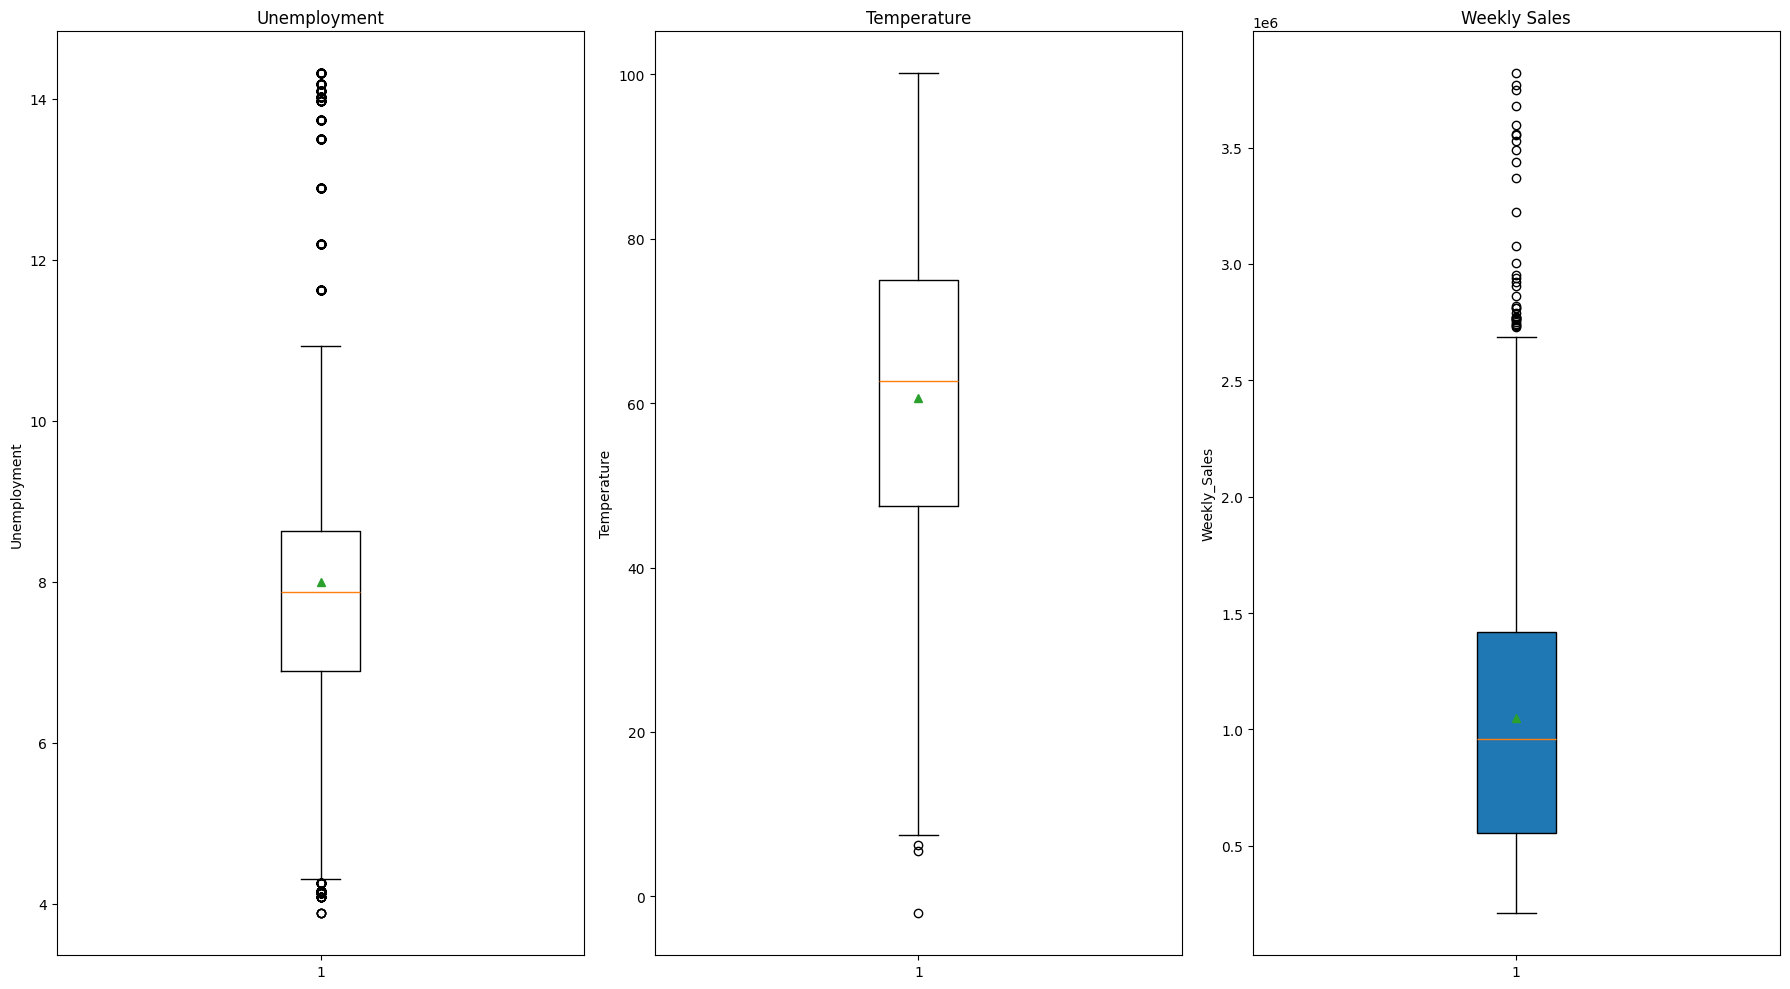

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18, 10))

axs[0].boxplot(x = df['Unemployment'], showmeans=True)
axs[0].set_title('Unemployment')
axs[0].set_ylabel('Unemployment')

axs[1].boxplot(x = df['Temperature'], showmeans=True)
axs[1].set_title('Temperature')
axs[1].set_ylabel('Temperature')


axs[2].boxplot(x= df['Weekly_Sales'], showmeans=True, patch_artist=True)
axs[2].set_title('Weekly Sales')
axs[2].set_ylabel('Weekly_Sales')

plt.tight_layout()
plt.show()

**Observations on Data**
>* Unmemployment
>>* The boxplot shows that there are outliers on the minimum and the maximum.
>* Temperature
>>* The boxplot shows only outliers on the minimum.
>* Weekly Sales
>>* The boxplot shows outliers only on the maximum of the data.

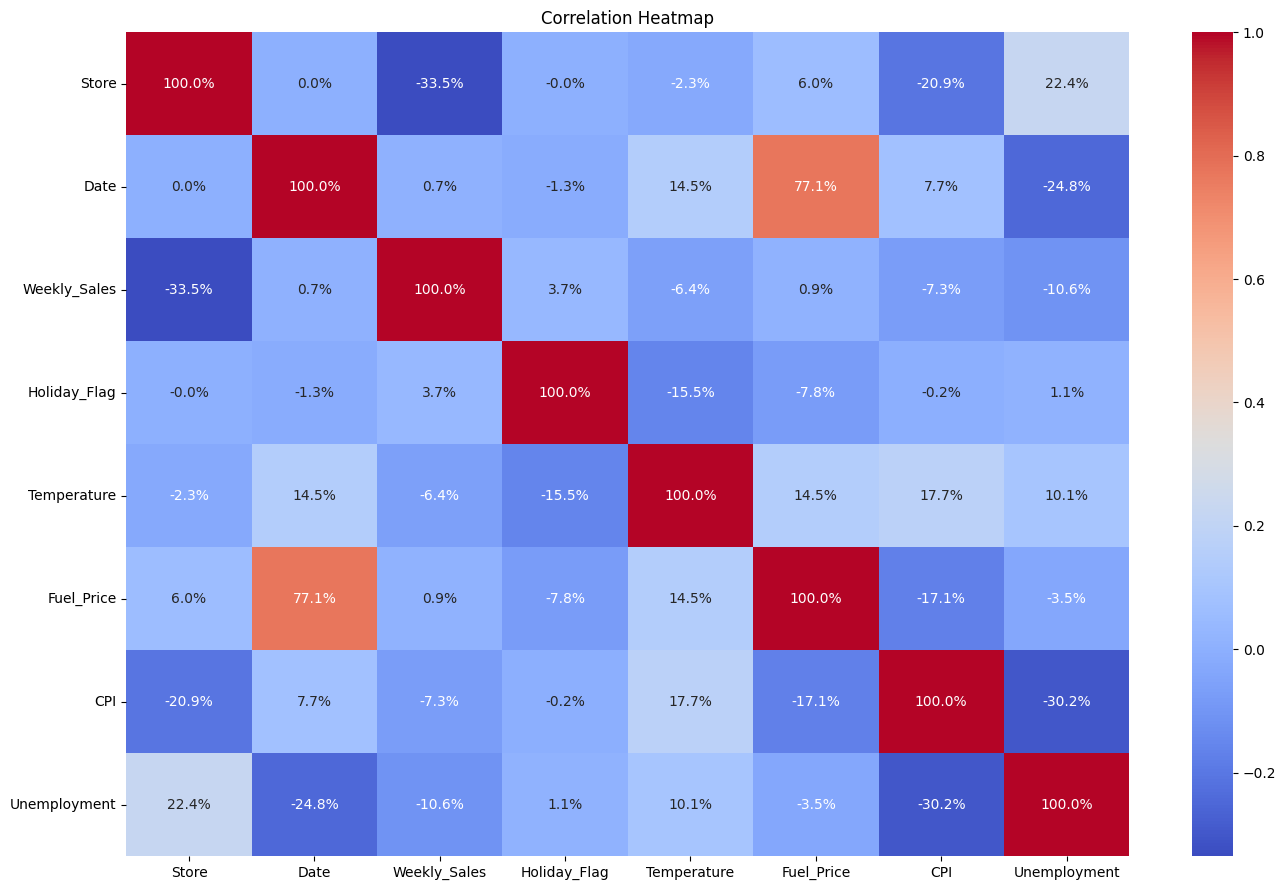

In [ ]:
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1%')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

**Correltation Heatmap**
>* The correlation Heatmap shows that the features that had the most correltation are Date with a positive 0.7% follow by fuel price with a positive 0.9% and the most correltation feature is Holyday Flag with a positive 3.7%.
>* The Heatmap also shows that Date and Fuel Prices had a high correltaion at 77.1% the highest in the all the heatmap.
>* Surprising to see that Temperature has alot of positive correltaions with other features such as Date with 14.5%, Fuel Price 14.5%, CPI 17.7% and Unemplyment with 10.1%.
>* Lastly the features of Store and Unemployment seem to had a positive correlation of 22.4% which can be the result of the location of the stores but further data will be require to answer the reason for this correlation.  

In [ ]:
oe = OrdinalEncoder()
df['Date'] = oe.fit_transform(df[['Date']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   float64
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 402.3 KB


In [ ]:
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(5148, 1287)

In [ ]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 5148, number of used features: 7
[LightGBM] [Info] Start training from score 1044996.414472
Mean Squared Error: 8874429180.112497


In [ ]:
model_2 = xgb.XGBRegressor()
model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_2)

Mean Squared Error: 9380899263.684544


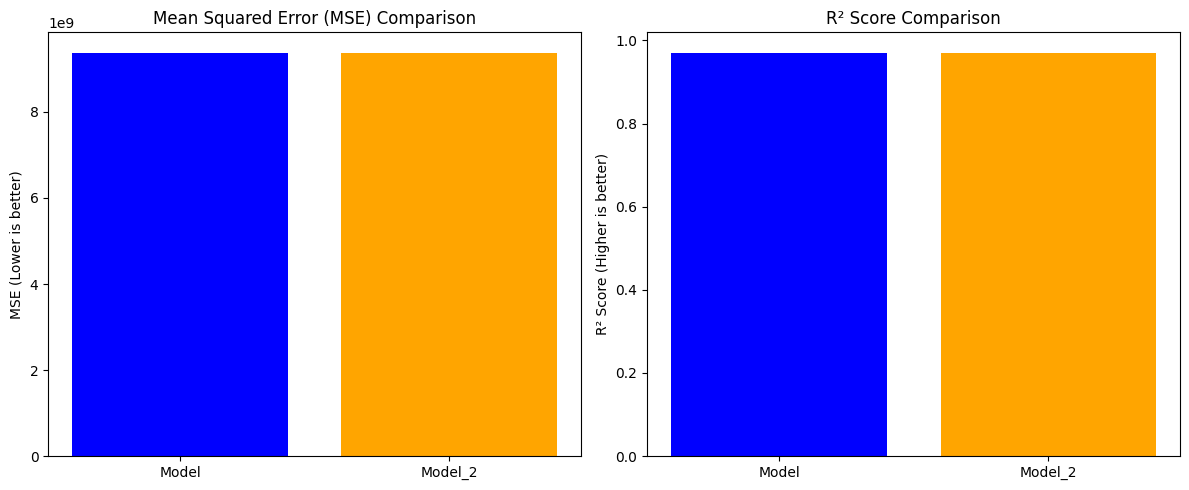

In [ ]:
# Calculate metrics
mse_model = mean_squared_error(y_test, y_pred)
mse_model_2 = mean_squared_error(y_test, y_pred_2)

r2_model = r2_score(y_test, y_pred)
r2_model_2 = r2_score(y_test, y_pred_2)

# Data for plotting
models = ['Model', 'Model_2']
mse_scores = [mse_model, mse_model_2]
r2_scores = [r2_model, r2_model_2]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# MSE Plot
ax1.bar(models, mse_scores, color=['blue', 'orange'])
ax1.set_title('Mean Squared Error (MSE) Comparison')
ax1.set_ylabel('MSE (Lower is better)')

# R² Plot
ax2.bar(models, r2_scores, color=['blue', 'orange'])
ax2.set_title('R² Score Comparison')
ax2.set_ylabel('R² Score (Higher is better)')

plt.tight_layout()
plt.show()